In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

classical_electron_radius = 2.81794032e-15  # [m]
elec_rest_energy = 8.1871057880e-14  # [J]
MeV = 1.6022e-13  # [J]
barn = 1e-28  # [m2]
mol = 6.021e23  # [/mol]
material_number_density = 19320000 / 196.97 * mol * 79
alpha = 1/137
speed_of_light = 299792458
Z = 79
hbar = 1.054571817e-34


/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


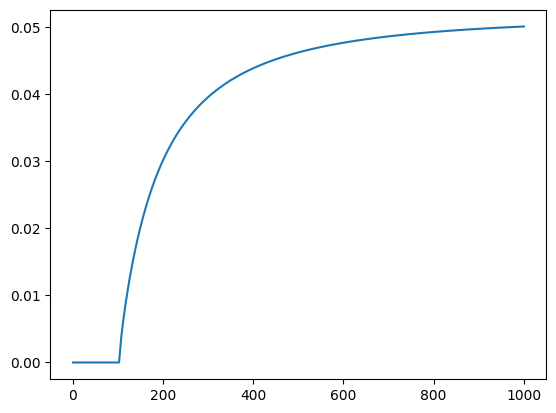

In [33]:
with open("./edata.txt", "r") as srem:
    SREM = np.array(
        [[float(y) for y in x.split(" ")[:2]] for x in srem.readlines()[9:]]
    )
    SREM[:, 0] *= MeV  #  MeV  ->  J
    SREM[:, 1] *= 19.32 * 100 * MeV  #  MeV g / cm^3  ->  J / m


def srem_attenuate(
    energy_in: npt.ArrayLike, depth_in: npt.ArrayLike, N: int = 1000
) -> npt.NDArray:
    energy = np.array(energy_in)
    depth = np.array(depth_in)
    dx = depth / N
    for _ in range(N):
        stopping_power = np.interp(energy, SREM[:, 0], SREM[:, 1])
        energy -= stopping_power * dx
    energy[energy < SREM[0, 0]] = 0
    return energy

X = np.linspace(1, 1000, 1000) * MeV
plt.plot(
    X/MeV,
    # srem_attenuate(X * MeV, 0.001) / MeV,
    srem_attenuate(X, 0.01) / X,
)
# SREM

In [51]:
srem_attenuate([[1.0,4],[2,3]],1.0)

array([[0.99999995, 3.99999995],
       [1.99999995, 2.99999995]])

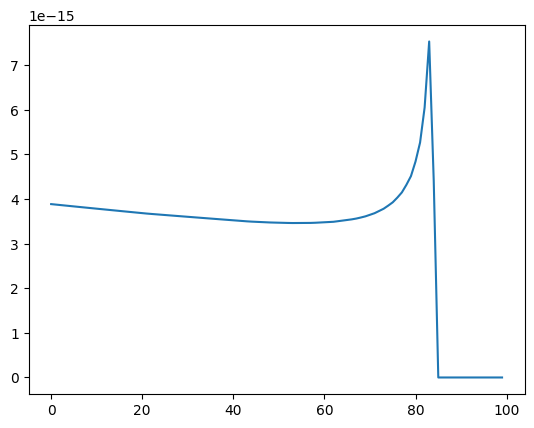

In [48]:
N = 100
energy = 2*MeV
depth = 0.001
dx = depth / N
v = [energy]
for _ in range(N):
    stopping_power = np.interp(energy, SREM[:, 0], SREM[:, 1])
    energy -= stopping_power * dx
    if energy < SREM[0,0]:
        energy = 0
    v.append(energy)
plt.plot(-np.diff(v))